Natural Language Processing
Review Data from Airbnb

In [71]:
#Read in libraries
import pandas as pd
import swifter
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import sklearn

In [72]:
#Settings for notebook
#Ignore warnings
import warnings; warnings.simplefilter('ignore')

#Increase number of columns and rows displayed by Pandas
pd.set_option('display.max_colwidth',1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',100)

In [73]:
#Set path to data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Air BnB - SF\Data\03_Processed'

#Read in data
reviews = pd.read_csv(path + '/01_10_2020_Reviews_Processed_Text_Analysis.csv',sep=',',
                 parse_dates=['date'])

In [74]:
reviews.head().T

,0,1,2,3,4
comments,This a jewel in the DogpatchPotrero area Super easy and prompt communication If driving easy access to the 101 and 280 as an added bonus Much recommended,Megs place is sparkling clean and in an awesome location Meg is also very friendly and so does the dog shes so sweet,We had a great time in SF and loved staying at this home Marjorie was most helpful and informative about getting around and using public transportation It was very easy and we didnt feel far from all the city attractions The accommodation was comfortable and very nice I would stay there again and recommend it to friends and family Thanks so much,Very cozy place with the beach literally right across the street Very clean Would definitely stay again,Kevin is very professional prompt and warmhearted individual He gave us a lot of good tips traveling the city Definitely five stars
date,2016-01-26 00:00:00,2019-03-08 00:00:00,2015-08-16 00:00:00,2018-10-17 00:00:00,2018-01-10 00:00:00
id_review,60697388,421167935,42860595,337874233,226453615
listing_id,288213,10427768,4269254,4252808,1393654
reviewer_id,308818,32888504,35391497,76550363,133118406
reviewer_name,Desigan,家惠,Hallie,Patrick,Daniel
host_is_superhost,True,True,True,True,True
host_response_time,within an hour,within an hour,within an hour,within an hour,within an hour
latitude,37.7597,37.7736,37.783,37.7573,37.7524
longitude,-122.388,-122.426,-122.432,-122.509,-122.459


Histogram of sentiment scores

Text(0.5, 1.0, 'Compound')

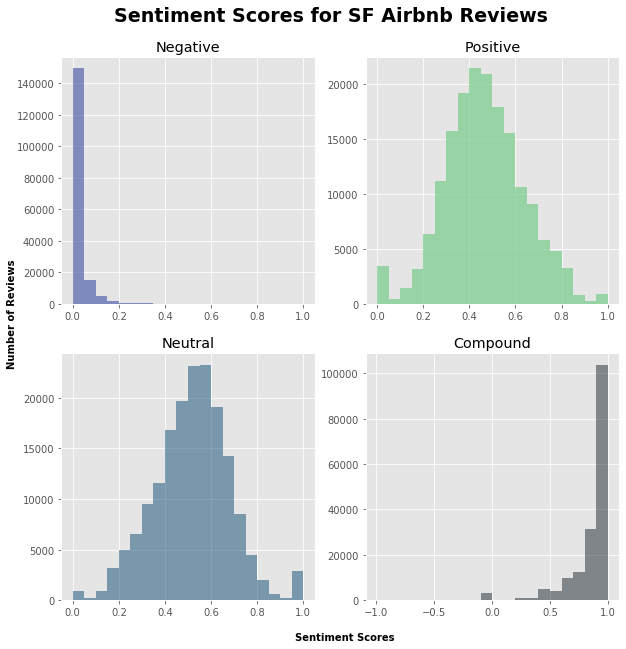

In [75]:
#Set style 
plt.style.use('ggplot')

#Set plot
fig, ax = plt.subplots(2,2, figsize = (10,10))

fig.suptitle('Sentiment Scores for SF Airbnb Reviews',fontsize =19,fontweight = 'bold', y =.95)
fig.text(.45,.07, 'Sentiment Scores', fontweight='bold')
fig.text(.05,.45, 'Number of Reviews', fontweight='bold', rotation = 'vertical')

#Plot 4 histograms
ax1 = reviews.sentiment_neg.hist(ax = ax[0,0],bins = 20, color = '#5f6caf', alpha = .75)
ax1.set_title("Negative")

ax2 = reviews.sentiment_pos.hist(ax = ax[0,1],bins = 20, color = '#7fcd91',alpha = .75)
ax2.set_title("Positive")

ax3 = reviews.sentiment_neu.hist(ax = ax[1,0],bins = 20, color = '#0f4c75',alpha = .5)
ax3.set_title("Neutral")

ax4 = reviews.sentiment_compound.hist(ax = ax[1,1],bins = 20, color = '#1b262c',alpha = .5)
ax4.set_title("Compound")


In [95]:
#Statistics in reference to sentiment scores
percentiles = reviews['sentiment_compound'].describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
percentiles

count    172459.000000
mean          0.847324
std           0.216315
min          -0.993800
10%           0.624900
20%           0.784500
30%           0.855500
40%           0.899900
50%           0.926900
60%           0.946000
70%           0.960100
80%           0.971900
90%           0.982100
max           0.999300
Name: sentiment_compound, dtype: float64

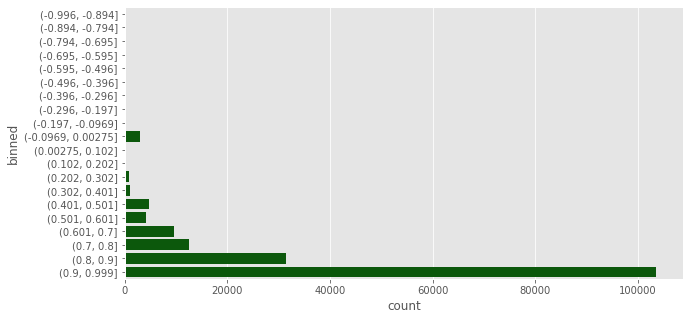

In [101]:
#split sentiment_compound scores into 20 bins
reviews['binned'] = pd.cut(reviews.sentiment_compound, bins = 20)

#Set fig size
fig, ax = plt.subplots(figsize = (10,5))

#Plot data
ax = sns.countplot(y = 'binned',data = reviews, ax=ax, color = 'darkgreen')




Our reviews are very positive. 
Let's compare the differences between the very positive comments and the very negative ones

## Differences in review length

In [79]:
reviews['comments_length'] = reviews.comments_parsed.apply(len)

positive_reviews = reviews[reviews.sentiment_compound > .99]
negative_reviews = reviews[reviews.sentiment_compound < -.5]

5607
498


Text(0.5, 0, 'Characters')

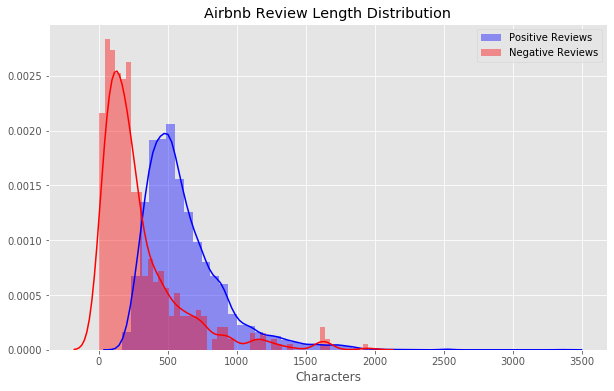

In [80]:
fig, ax = plt.subplots(figsize=(10,6))

#Plot Histogram
sns.distplot(positive_reviews.comments_length, kde = True, bins = 50, color = 'b')
sns.distplot(negative_reviews.comments_length, kde = True, bins = 50, color = 'r')

plt.legend(labels = ['Positive Reviews', 'Negative Reviews'], frameon = True);
ax.set_title('Airbnb Review Length Distribution')
ax.set_xlabel('Characters')

Let's look at a subset of some of these reviews

Postive Reviews

In [81]:
#Positive reviews
positive_reviews.comments[0:50:5]

27                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Mohit  Fatima are so sweet and welcoming Great hosts Their cats Inka  Maya are the kindest little furry friends and very affectionate Space is welldecorated and kept clean the bed is super comfortable and if you get lucky enough you may get to smell some of the amazing food Mohit  Fatima are preparing Truly a great experience and the neighbourhood was walking distance to the Mission along Folsom and Bernal Heights Would re

Word Clouds


In [82]:
#Positive Word Cloud

In [83]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image


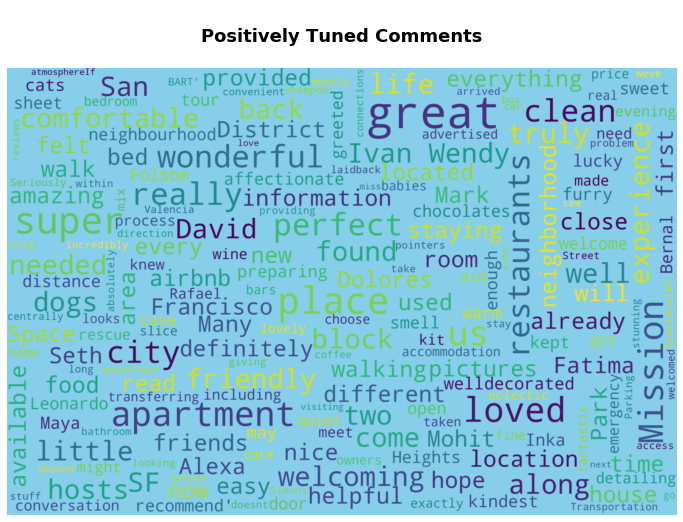

In [84]:
wordcloud = WordCloud(max_font_size=200, max_words=200, background_color="skyblue",
                      width= 3000, height = 2000).generate(str(positive_reviews.comments.values))

def plot_wordcloud(wordcloud, language):
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(language + ' Comments\n', fontsize=18, fontweight='bold')
    plt.show()
    
plot_wordcloud(wordcloud, '\nPositively Tuned')

In [85]:
#What are the most popular words in positive reviews?

In [117]:
#Import count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english').fit(positive_reviews.comments)

print('Vocabulary used in positive reviews: {}'.format(len(count.vocabulary_)))

bow = count.transform(positive_reviews.comments)
sum_words = bow.sum(axis=0)

#we sort a list of tuples that contain the word and their occurrence in the corpus
words_freq = [(word, sum_words[0, idx]) for word, idx in count.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

Vocabulary used in positive reviews: 16162


In [118]:
positive_words = pd.DataFrame(words_freq, columns =['Word', 'Count']) 

Text(0, 0.5, '')

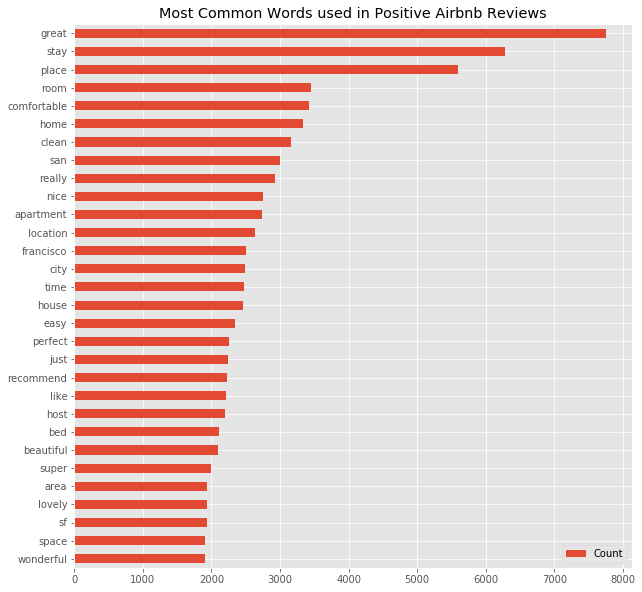

In [130]:
positive_words = positive_words.head(30)

fig,ax = plt.subplots(figsize = (10,10))
positive_words.sort_values(by='Count').plot(x = 'Word',y='Count',kind='barh', ax=ax)

ax.set_title('Most Common Words used in Positive Airbnb Reviews')
ax.set_ylabel('')

In [86]:
#Topic modeling and document clustering for postive reviews

In [139]:
from gensim


<5607x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 290190 stored elements in Compressed Sparse Row format>

(10, 10000)


array([[0.28783433, 0.00344906, 0.00344862, ..., 0.00344871, 0.0034487 ,
        0.00344892],
       [0.00131614, 0.18273761, 0.00131619, ..., 0.00131605, 0.0013162 ,
        0.48858317],
       [0.00303114, 0.00303083, 0.0030311 , ..., 0.00303084, 0.00303102,
        0.0030311 ],
       ...,
       [0.00277835, 0.63991949, 0.3378521 , ..., 0.00277844, 0.00277874,
        0.00277871],
       [0.00303104, 0.00303092, 0.37715071, ..., 0.00303092, 0.59860101,
        0.00303087],
       [0.00243957, 0.00243949, 0.00243956, ..., 0.00243927, 0.00243983,
        0.00243951]])

## Negative Reviews

In [88]:
#Negative reviews
negative_reviews.comments[5:15]

2285                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Ankas Appartement hat ein super Lage nahe Downtown Die Nachbarschaft ist ein sehr angenehm Einzig die schlechte Parksituation ist nicht ideal  wie in ganz SFO Am besten auf ein Mietwagen verzichten Das Appartement ist sehr angenehm eingerichtet und sauber Mein Zimmer war gut ausgestattet und toll vorbereitet Der Kontakt mit Anka war unkompliziert und sehr angenehm 
2424                                                                                                                                 

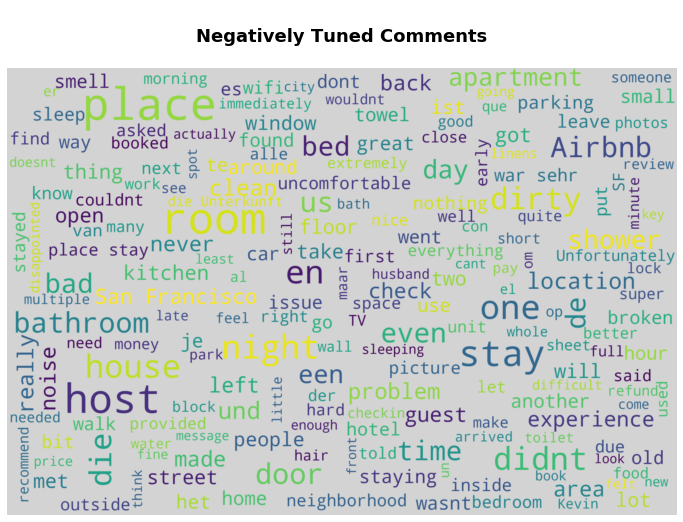

In [89]:
wordcloud = WordCloud(max_font_size=200, max_words=200, background_color="lightgray",
                      width= 3000, height = 2000).generate(str(negative_reviews.comments.values))

plot_wordcloud(wordcloud, '\nNegatively Tuned')

In [90]:
#What are the most popular words in negative reviews?

In [134]:
count = CountVectorizer(stop_words='english').fit(negative_reviews.comments)

print('Vocabulary used in negative reviews: {}'.format(len(count.vocabulary_)))

bow = count.transform(negative_reviews.comments)
sum_words = bow.sum(axis=0)

#we sort a list of tuples that contain the word and their occurrence in the corpus
words_freq = [(word, sum_words[0, idx]) for word, idx in count.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

Vocabulary used in negative reviews: 4622


In [135]:
negative_words = pd.DataFrame(words_freq, columns =['Word', 'Count']) 

Text(0, 0.5, '')

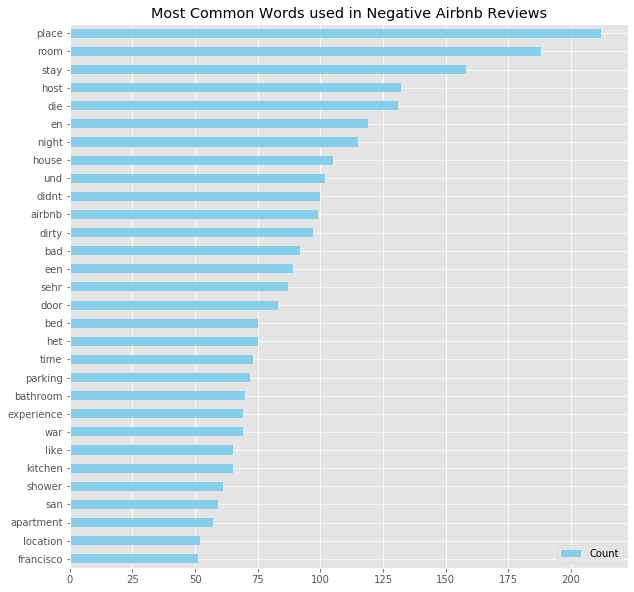

In [137]:
negative_words = negative_words.head(30)

fig,ax = plt.subplots(figsize = (10,10))
negative_words.sort_values(by='Count').plot(x = 'Word',y='Count',kind='barh', ax=ax, color = 'skyblue')

ax.set_title('Most Common Words used in Negative Airbnb Reviews')
ax.set_ylabel('')

In [91]:
#Topic modeling for negative reviews

In [92]:
#What insights can you gain from these?

In [93]:
#Topic modeling for negative reviews

In [94]:
#what insights can you gain?